In [ ]:
"""
To access data from MySQL DB on RDS we used a python script with hardcoded credentials ans DB endpoint .
We import SQLAlchemy, Pandas, and the Python logging module to interact with a MySQL database and perform data retrieval operations 

 """
from sqlalchemy import create_engine, text
from urllib.parse import quote
import pandas as pd
import argparse
import logging
import sys
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[
        logging.FileHandler("debug.log"),
        logging.StreamHandler()
    ]
)
# function creating connection , given our DB credentials 
def create_db_engine(db_url='dsunda8.cmamnye7dtwb.us-east-1.rds.amazonaws.com', user='admin', pasw='Kampalam123', port=3306, schema_name='Food'):
    # logging.info("Creating connection string")
    engine = create_engine(f"mysql+mysqlconnector://{user}:{quote(pasw)}@{db_url}:{port}/{schema_name}")
    return engine
#
"""
     the function establish a connection to the database, execute the given SQL query, 
    and fetch the results into a Pandas DataFrame. It handles exceptions during the database 
    operations and logs appropriate error messages. The database connection is closed properly 
    in a finally block.
    """
def sql_to_df(query, engine=None):
    # logging.info("Inside save_data_from_database.")
    try:
        if engine==None:
            engine = create_db_engine()
        mysql_conn = engine.connect()
        # logging.info("Connected to database successfully.")
        query = text(query)
        try:
            df = pd.read_sql(query, mysql_conn)
        except Exception as e:
            logging.error(e)
            return
        # logging.info("Finished sql query execution.")
        # logging.info("Got the table result into a dataframe.")
        # logging.info(f"Columns:{df.shape[1]}, Rows:{df.shape[0]}")
    except Exception as e:
        logging.error(f"Error: {e}")
    finally:
        # logging.info("Closing database connection.")
        mysql_conn.close()
    
    return df
        



In [3]:
#importing modules to assist in visualization
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:

# Extract the RecipeIngredientParts from the stagingrecipes table
# Use a regular Expression to clean the text values to get rid of non alphabets by replacing them with empty string 
# we then call sql_to_df function to extract data and then print top five records 

sql = """select REGEXP_REPLACE(RecipeIngredientParts, '[^A-Za-z0-9 ]', '') RecipeIngredientParts from stagingrecipes;"""
recipeIngredients = sql_to_df(sql)
print(recipeIngredients.shape)
recipeIngredients.head()

(522517, 1)


,RecipeIngredientParts
0,cblueberries granulated sugar vanilla yogurt l...
1,csaffron milk hot green chili peppers onions g...
2,csugar lemons rind of lemon zest of fresh wate...
3,cextra firm tofu eggplant zucchini mushrooms s...
4,cplain tomato juice cabbage onion carrots celery


In [6]:
"""
 --To look do anlysis on R Ingredients used by food.com, we use the recipeIngredients data frame and plot a wordcloud to display the most frequent words as port of the ingredients
 -- We import WordCloud and associated utilities for generating word cloud visualizations
 ---create a list of English stop words from the NLTK library.
 ---Extend the existing list of stopwords from Nltk with a custom list of words that are not related to the recipes 

"""

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = list(set(stopwords.words('english')))
stop_words.extend(['ive', 'truist', 'app', 'account', 'bank', 'banking', 'im', 'account', 'suntrust', 'bbt'])
print(len(stop_words))

#function takes cleans a string by removing stop words, punctuation, and extra spaces.
#Splits by space, the cleaned string into individual words (tokens) based on spaces.
#Converts all tokens to lowercase and filter out any tokens that are in the stopwords list 'stpwds'.
#Joins the remaining tokens back into a single string, separated by spaces.
#Then returns Return final cleaned string, ensuring there are no double spaces.
def remove_stop_words(ingredients_string, stpwds=stop_words):
    review_string = review_string.translate(str.maketrans('', '', string.punctuation))
    items = review_string.split(' ')
    items = [i.lower() for i in items if i.replace("'",'').lower().strip() not in list(stpwds)]
    items = " ".join(items)
    return items.replace('  ', ' ')
#function is designed to generate and display a word cloud from a list of words
#Apply the 'remove_stop_words' function to each item in the 'word_list' to clean the text.
#makes a list of the cleaned words
#Initialize a WordCloud object and generate the word cloud from the aggregated text.
def plot_word_cloud(word_list, item_type='reviews'):
    word_list = [remove_stop_words(i) for i in word_list]
    reviews_final = " ".join(word_list)
    wordcloud = WordCloud().generate(reviews_final)
    # background_color="white"
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

189


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


522517


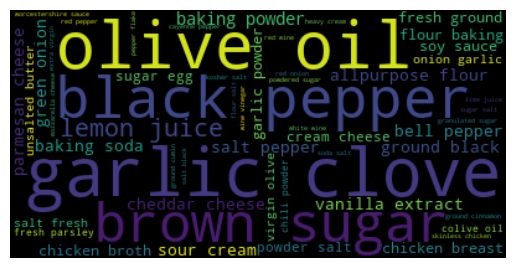

In [34]:
#Extract the 'RecipeIngredientParts' column from the 'recipeIngredients' DataFrame.
#then call the ploting function to get the word cloud 
RecipeIngredientParts = recipeIngredients['RecipeIngredientParts']
print(len(RecipeIngredientParts))
plot_word_cloud(RecipeIngredientParts)